# Анализ гипотез для увеличения выручки <a id="head"></a>

Отдел аналитики с отделом маркетинга крупного интернет-магазина подготовили список гипотез для увеличения выручки.

**Задача:** приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Описание данных:**

`hypothesis.csv`
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

`orders.csv`
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

`visitors.csv`
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

<h4>Содержание:<span class="tocSkip"></span></h4>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Датафрейм-hypothesis" data-toc-modified-id="Датафрейм-hypothesis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Датафрейм hypothesis</a></span></li><li><span><a href="#Датафрейм-orders" data-toc-modified-id="Датафрейм-orders-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Датафрейм orders</a></span></li><li><span><a href="#Датафрейм-visitors" data-toc-modified-id="Датафрейм-visitors-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Датафрейм visitors</a></span></li></ul></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Применение-фреймворка-ICE-для-приоритизации-гипотез" data-toc-modified-id="Применение-фреймворка-ICE-для-приоритизации-гипотез-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Применение фреймворка ICE для приоритизации гипотез</a></span></li><li><span><a href="#Применение-фреймворка-RICE-для-приоритизации-гипотез" data-toc-modified-id="Применение-фреймворка-RICE-для-приоритизации-гипотез-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Применение фреймворка RICE для приоритизации гипотез</a></span></li><li><span><a href="#Измениение-приоритизации-гипотез-при-применении-RICE-вместо-ICE" data-toc-modified-id="Измениение-приоритизации-гипотез-при-применении-RICE-вместо-ICE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Измениение приоритизации гипотез при применении RICE вместо ICE</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#График-кумулятивной-выручки-по-группам" data-toc-modified-id="График-кумулятивной-выручки-по-группам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>График кумулятивной выручки по группам</a></span></li><li><span><a href="#График-кумулятивного-среднего-чека-по-группам" data-toc-modified-id="График-кумулятивного-среднего-чека-по-группам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>График кумулятивного среднего чека по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#График-кумулятивного-среднего-количества-заказов-на-посетителя-по-группам" data-toc-modified-id="График-кумулятивного-среднего-количества-заказов-на-посетителя-по-группам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>График кумулятивного среднего количества заказов на посетителя по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A</a></span></li><li><span><a href="#Точечный-график-количества-заказов-по-пользователям" data-toc-modified-id="Точечный-график-количества-заказов-по-пользователям-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Точечный график количества заказов по пользователям</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-количества-заказов-на-пользователя" data-toc-modified-id="95-й-и-99-й-перцентили-количества-заказов-на-пользователя-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>95-й и 99-й перцентили количества заказов на пользователя</a></span></li><li><span><a href="#Точечный-график-стоимостей-заказов" data-toc-modified-id="Точечный-график-стоимостей-заказов-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Точечный график стоимостей заказов</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-стоимости-заказов." data-toc-modified-id="95-й-и-99-й-перцентили-стоимости-заказов.-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>95-й и 99-й перцентили стоимости заказов.</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a></span></li><li><span><a href="#Решение-по-результатам-теста" data-toc-modified-id="Решение-по-результатам-теста-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Решение по результатам теста</a></span></li></ul></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></div>

## Предобработка данных

In [1]:
# импортируем библеотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
pd.set_option('display.max_colwidth', None)

### Датафрейм hypothesis

In [2]:
hypothesis=pd.read_csv('datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# общая информация
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# поиск дубликатов
hypothesis.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

Дубликатов и пропусков нет, верный тип данных.

### Датафрейм orders

In [5]:
orders=pd.read_csv('datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
# общая информация
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
# поиск дубликатов
orders.duplicated().sum()

0

In [8]:
# изменение типа данных
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
# проверка
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Дубликатов и пропусков нет. В столбце с датами изменили тип данных на datetime64.

### Датафрейм visitors

In [10]:
visitors=pd.read_csv('datasets/visitors.csv')

In [11]:
# общая информация
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
# поиск дубликатов
visitors.duplicated().sum()

0

In [13]:
# изменение типа данных
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
# проверка
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Дубликатов и пропусков нет. В столбце с датами изменили тип данных на datetime64.

Датафреймы загруженны, изменён тип данных, дубликатов нет.

## Приоритизация гипотез

In [15]:
# откроем файл с гипотезами
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применение фреймворка ICE для приоритизации гипотез

In [16]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis['ICE'] = round(hypothesis['ICE'], 2)
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотизы по ICE: 8, 0, 7.

### Применение фреймворка RICE для приоритизации гипотез

In [18]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотизы по RICE: 7, 2, 0, 6.

### Измениение приоритизации гипотез при применении RICE вместо ICE

In [19]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


Гипотезы:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

оказались самыми перспектиными.

Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" по RICE оказалась менее, тк маленький охват пользователей. Предположение о добалении блоков "рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" Reach наоборт большой и равен 8. 

## Анализ A/B-теста

### График кумулятивной выручки по группам

In [20]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


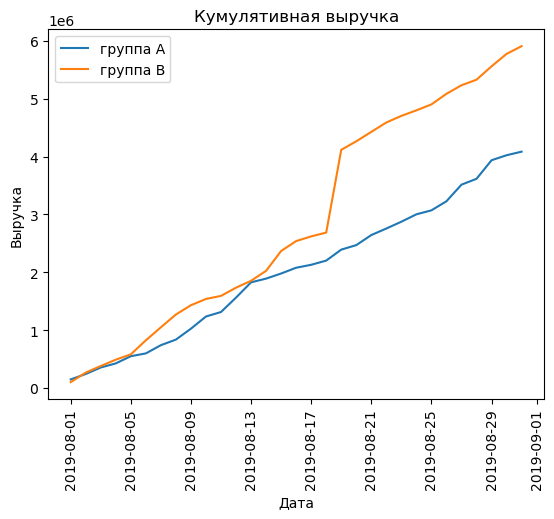

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')

plt.title('Кумулятивная выручка')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation = 90)
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. У группы В на протяжении всего теста более высокие показатели. 18.08.2019 резкий скачок в групее В, что может говорить о увеличении продаж или крупной покупке.


### График кумулятивного среднего чека по группам

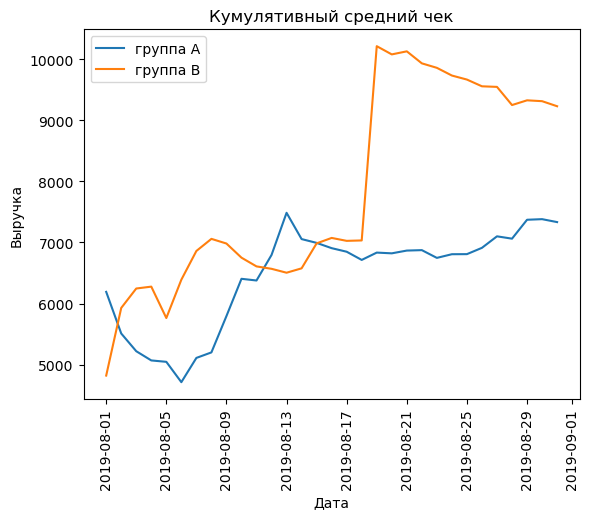

In [25]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')

plt.title('Кумулятивный средний чек')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation = 90)
plt.legend();

Средний чек становится равномерным ближе к концу теста. В группе А 06.08.2018 было снижение значений, 13.08 был пик, выше не поднимался и далее держался на одном уровне. В групее В 18.08.2019 резкий скачок среднего чека подтвержает наличие крупных заказов.

### График относительного изменения кумулятивного среднего чека группы B к группе A

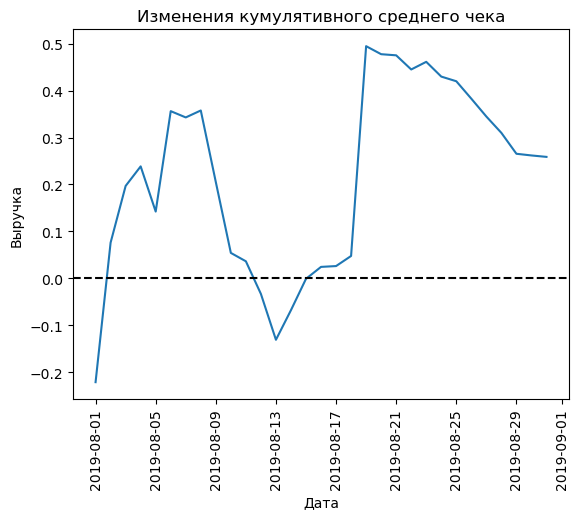

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.title('Изменения кумулятивного среднего чека')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation = 90);

Результаты теста значительно и резко менлись в несколько дат, можем предположить, что это связано с датами когда были совершены аномальные заказы, например в 18.08.2019.

### График кумулятивного среднего количества заказов на посетителя по группам

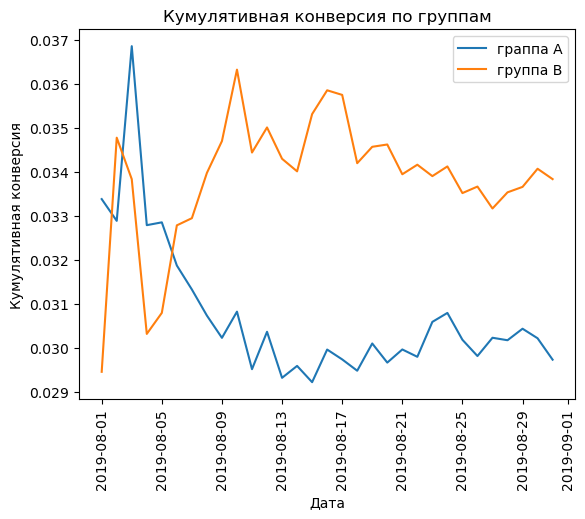

In [27]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='граппа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='группа B')
plt.legend()

plt.title('Кумулятивная конверсия по группам')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.xticks(rotation = 90);

В начале теста группа А имела большую конверсию, но постепенно группа Б заняла лидирующую позицию. Конверсия в обеих сигментах остановилась около своих средних значениях.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

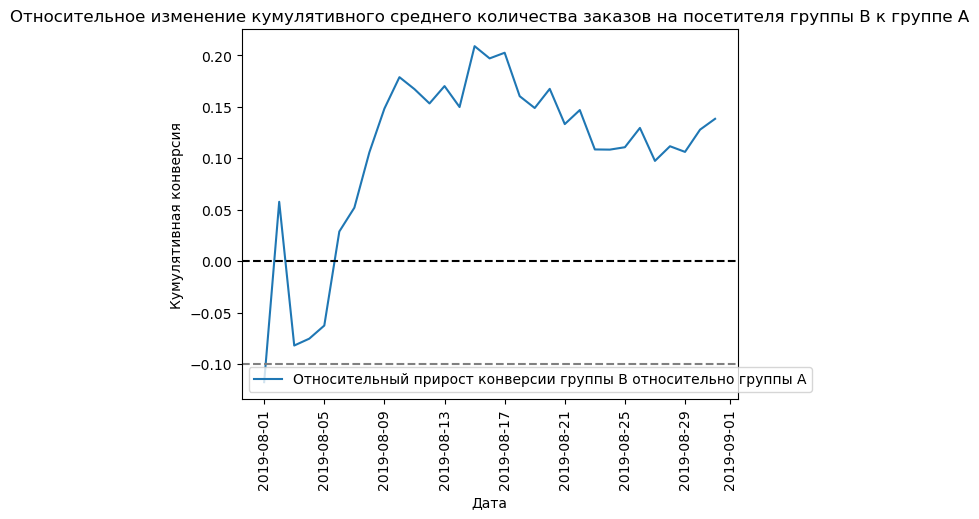

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.xticks(rotation = 90);

В начале теста группа B значительно проигрывала группе A (кроме 02.08.2019), затем вырвалась вперёд. Потом её конверсия  падала, но теперь с 27.08.2019 постепенно растёт.

### Точечный график количества заказов по пользователям

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


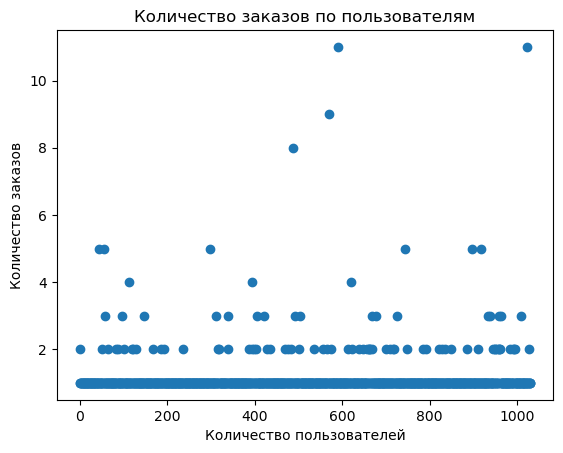

In [29]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей');

Большенство пользователей совершили один заказ. Много пользователей с 2-3 заказами, но их точная доля не ясна, поэтому не можем сказаать аномалии они или нет.

### 95-й и 99-й перцентили количества заказов на пользователя

In [30]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа и не более 1% более 4 заказов. Расчитам перцентили для более точного ответа. 

In [31]:
print(np.percentile(ordersByUsers['orders'], [90, 91, 93, 94, 95, 96, 97, 98])) 

[1. 2. 2. 2. 2. 2. 2. 3.]


Видим что 98% пользователей делают 1 или 2 заказа. Остальные 2% аномальные значения.

### Точечный график стоимостей заказов

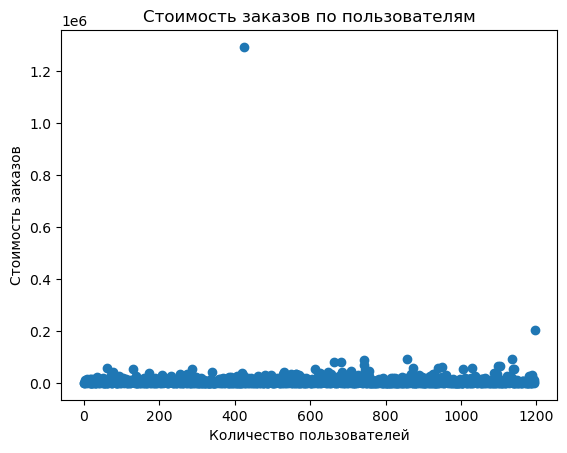

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.title('Стоимость заказов по пользователям')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей');

Большенство заказов имеют минималью вырочку. По графику видно аномальный заказ. Построим более наглядную модель. 

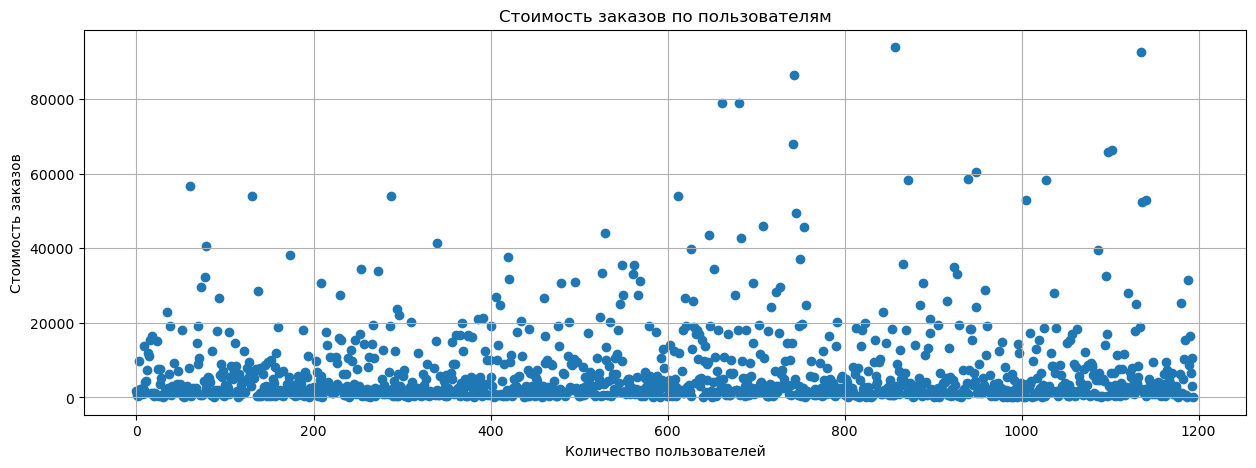

In [44]:
norm_orders = orders[orders['revenue']<=195000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(xn_values, norm_orders)
plt.title('Стоимость заказов по пользователям')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей');

По графику можно выбрать границу аномальных заказов до 20000. Большенство заказов суммой примерно 10000.

### 95-й и 99-й перцентили стоимости заказов.

In [34]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28000, укажем это значение анамальным. Не более 1% дороже 58233. 

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипитизу: Н0 - статистически значимых различий в конверсии между группами нет;
Н1 - есть статистически значимые различия в конверсии между группами 

In [35]:
# подготовка данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [36]:
# посчитаем статистическую значимость различия
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print('Относительное различие среднего количества заказов между сегментами {0:.1%}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.017
Относительное различие среднего количества заказов между сегментами 13.8%


p-value меньше alpha = 0.05, значит нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Анализ "сырых данных" сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B равен 13.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипитизу: Н0 - статистически значимых различий в среднем чеке заказа между группами нет;
Н1 - есть статистически значимые различия в среднем чеке заказа между группами 

In [37]:
print('p-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека между сегментами {0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value 0.729
Относительное различие среднего чека между сегментами 25.9%


p-value больше alpha = 0.05, значит статистически значимых различий в среднем чеке заказа между группами нет. При этом относительный прирост среднего чека группы B равен 25.9%.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 2% пользователей с наибольшим числом заказов и  5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [38]:
a = np.percentile(ordersByUsers['orders'], [95, 99])

In [39]:
b = a[0]

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > b]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > b]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


Всего 74 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста и после применим статистический критерий Манна-Уитни к полученным выборкам.

Сформулируем гипотизы:
Н0 - статистически значимых различий в конверсии между группами по «очищенным» данным нет;
Н1 - есть статистически значимые различия в конверсии между группами по «очищенным» данным

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие среднего количества заказов между сегментами {0:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value 0.013
Относительное различие среднего количества заказов между сегментами 17.3%


Результаты по среднему количеству заказов практически не изменились. Сегмент В значительно лучше сегмента А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипитизы: Н0 - статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет; 
Н1 - есть статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным.

In [42]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие среднего чека между сегментами {0:.1%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
Относительное различие среднего чека между сегментами -2.0%


P-value практически не изменился, значит, статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет. Относительный прирост возникает случайным образом

### Решение по результатам теста

Остановить тест, зафиксировать победу группы В.

## Выводы:

Для увеличения выручки интернет-магазина был сформирован список гипотез, который в ходе анализа приоритизироли и запустили A/B-тест.
Результат приоритизирования гипотез: 
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

Реализация гипотиз позволит изпользовать не большие затраты ресурсов и максимизировать ожидаемое улучшение ключевых метрик бизнеса.

Результаты A/B-теста: 
* Остановить тест, зафиксировать победу группы В
* Выручка почти равномерно увеличивается в течение всего теста. У группы В на протяжении всего теста более высокие показатели.
* Средний чек в группе В более высокий становится равномерным ближе к концу теста у обеих групп.
* 98% пользователей делают 1 или 2 заказа. Не более 5% заказов дороже 28000.
* Есть статистически значимые различия в конверсии между группами. Относительный прирост в среднем количестве заказов группы B по «сырым» данным равен 13.8%, по «очищенным» данным 17.3%.
* Статистически значимых различий в среднем чеке заказа между группами нет. Относительный прирост, который возникает случайным образом, среднего чека группы B по «сырым» данным равен 25.9%, по «очищенным» данным -2%.

[Начало](#head)